In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"D:\OneDrive\Desktop\yt python data\Customer Churn.csv")

In [3]:
df.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [13]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.isnull().sum().sum()

0

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df["customerID"].duplicated().sum()

0

In [35]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

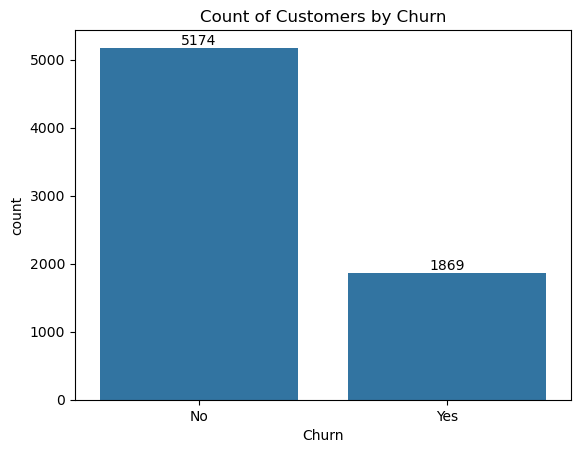

In [61]:
ax = sns.countplot(x = df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

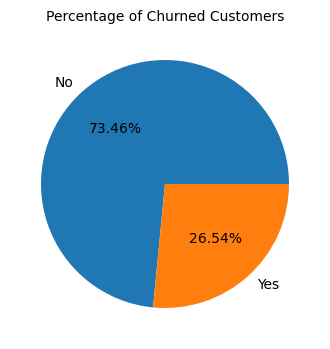

In [91]:
plt.figure(figsize = (4,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize =10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have Churned out. 

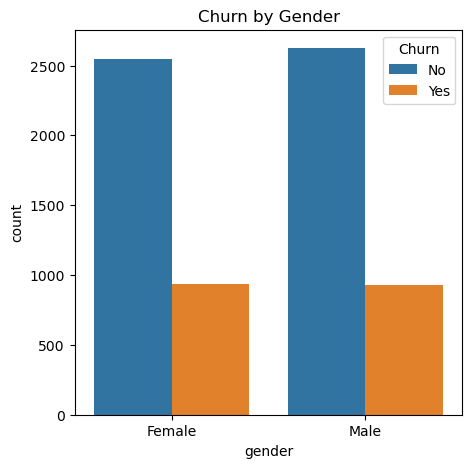

In [89]:
plt.figure(figsize = (5,5))
sns.countplot(x = df["gender"], hue = df["Churn"])
plt.title("Churn by Gender")
plt.show()

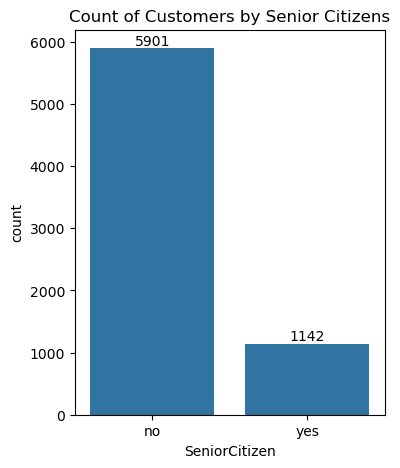

In [111]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = df["SeniorCitizen"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens")
plt.show()

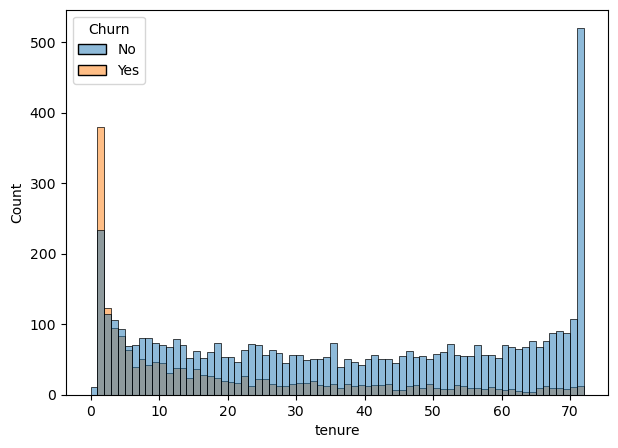

In [19]:
plt.figure(figsize = (7,5))
sns.histplot(x = "tenure", data = df, bins =  72, hue = "Churn")
plt.show()


#people who have used our services  for a long time have stayed and people who have used our services 1 or 2 months have churned

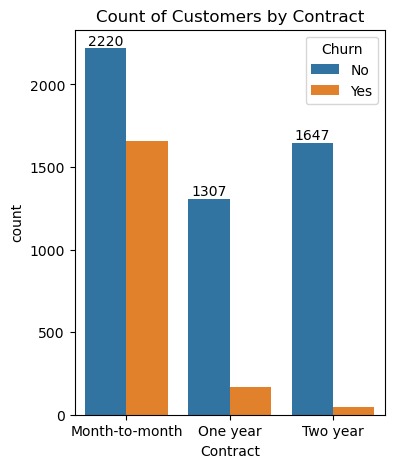

In [27]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = df["Contract"], hue = df["Churn"] )
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [30]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

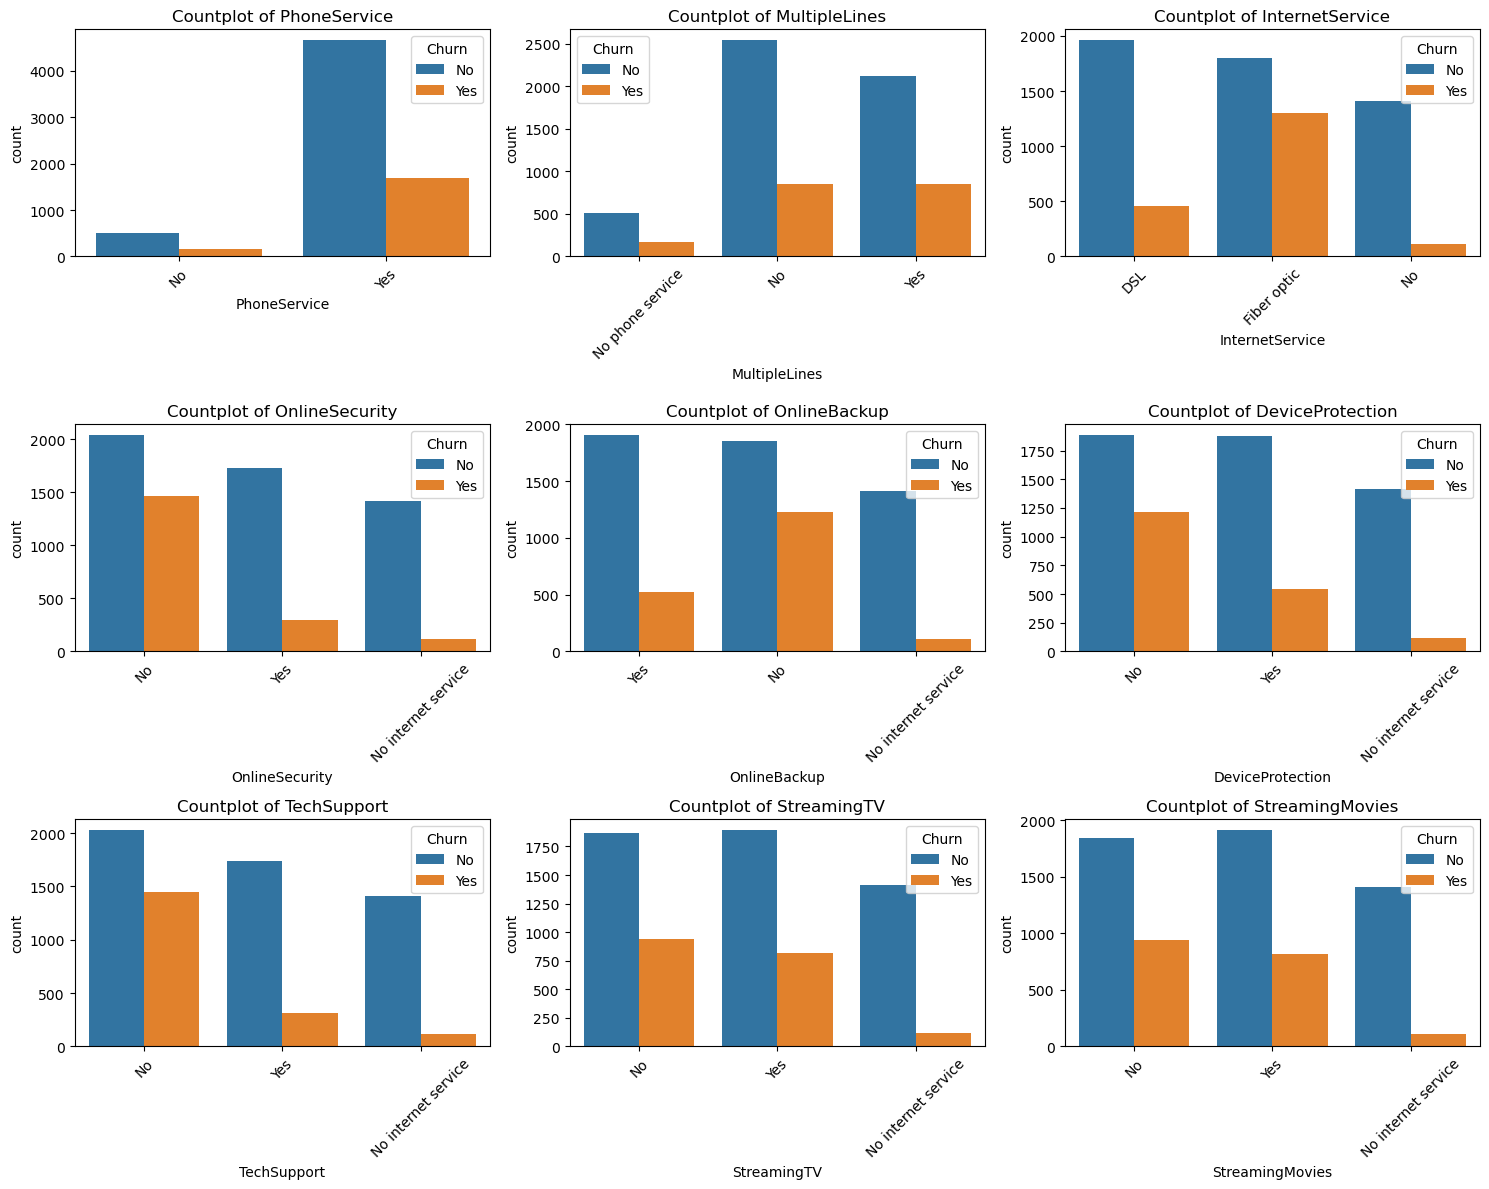

In [16]:
# List of the selected columns
selected_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(selected_columns) // n_cols) + (len(selected_columns) % n_cols > 0)  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4* n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each selected column and create countplot
for i, column in enumerate(selected_columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'Countplot of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Remove any empty subplots (if the number of columns is not a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlapping labels
plt.tight_layout()
plt.show()


#Customers without additional services like OnlineSecurity, OnlineBackup, or TechSupport show higher churn rates, while those with these services tend to retain better. Internet service type also plays a role, with Fiber optic customers exhibiting higher churn compared to DSL. Streaming services and multiple lines show mixed trends, with churn influenced by other factors.

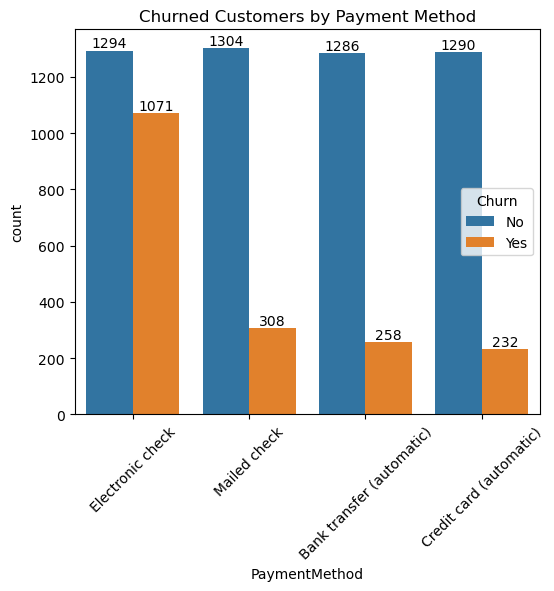

In [25]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = df["PaymentMethod"], hue = df["Churn"] )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when is using electronic check as a payment method 